In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns
import scipy.io as scio
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def get_active_cells(deconvolved_traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(deconvolved_traces.keys())

    for cell in deconvolved_traces:
        if deconvolved_traces[cell]['active'] == True:
            d[cell] = deconvolved_traces[cell]
        else:
            d.pop(cell,None)

    return d

In [3]:
data_pre =  "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-142/suite2p/plane0/cells.pkl"
data_post = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-143/suite2p/plane0/cells.pkl"



with open(data_pre, 'rb') as f:
    data_pre = pickle.load(f)

with open(data_post, 'rb') as f:
    data_post = pickle.load(f)

In [5]:
print(data_post[1]['matched_cells'])

[[   3    1]
 [   5  264]
 [  11   37]
 [  12   52]
 [  13   40]
 [  15  271]
 [  16   31]
 [  21   12]
 [  22   56]
 [  23   96]
 [  24  129]
 [  30  249]
 [  31  194]
 [  36  490]
 [  39  116]
 [  41   41]
 [  49    3]
 [  54   99]
 [  57  565]
 [  59   79]
 [  60  370]
 [  65  164]
 [  70   95]
 [  71  456]
 [  83  320]
 [  87   33]
 [  90  138]
 [  96  475]
 [  98  359]
 [  99   46]
 [ 105   89]
 [ 106 1040]
 [ 107   54]
 [ 111  590]
 [ 120  306]
 [ 124  322]
 [ 125   65]
 [ 129   74]
 [ 133  323]
 [ 134  289]
 [ 138  215]
 [ 145  331]
 [ 147  124]
 [ 152  223]
 [ 154   70]
 [ 155  222]
 [ 158   19]
 [ 163  272]
 [ 171   23]
 [ 172  120]
 [ 177  520]
 [ 178   91]
 [ 181  562]
 [ 182  102]
 [ 183  154]
 [ 185  591]
 [ 201  419]
 [ 206   68]
 [ 213  380]
 [ 214  119]
 [ 223  155]
 [ 224   77]
 [ 231  179]
 [ 232  493]
 [ 235  140]
 [ 240  539]
 [ 246  319]
 [ 251  578]
 [ 257  158]
 [ 268  187]
 [ 269  649]
 [ 276  143]
 [ 284   73]
 [ 287  109]
 [ 323  548]
 [ 342  259]
 [ 357  744]

In [33]:
active_pre = get_active_cells(data_pre)
active_post = get_active_cells(data_post)

In [34]:
print(len(data_pre.keys()))


print(len(active_pre.keys()))
print(len(active_post.keys()))

538
250
262


In [71]:
active_both = [key for key in active_pre.keys() if key in active_post]


active_only_post = [key for key in active_post if key not in active_pre]
print(len(active_only_post))


active_only_pre = [key for key in active_pre if key not in active_post]
print(len(active_only_pre))
print(active_only_pre)

91
90
[8, 15, 19, 29, 31, 35, 42, 47, 52, 76, 77, 81, 91, 94, 97, 98, 115, 117, 118, 120, 124, 125, 131, 134, 144, 148, 152, 156, 160, 187, 192, 193, 197, 208, 216, 237, 238, 242, 243, 254, 263, 271, 278, 290, 304, 330, 331, 333, 362, 378, 389, 396, 403, 406, 409, 417, 418, 423, 428, 489, 491, 495, 497, 508, 512, 518, 552, 576, 588, 610, 618, 624, 653, 683, 743, 752, 761, 832, 837, 867, 887, 961, 976, 1032, 1081, 1156, 1265, 1344, 1509, 2681]


In [6]:
key1 = 13
key2 = 40



In [15]:
def find_max_column(arr):
    # Find the column index of the global maximum value in the flattened array
    global_max_index = np.argmax(arr)

    # Convert the flattened index to row and column indices
    row_index, global_max_column_index = np.unravel_index(global_max_index, arr.shape)

    return global_max_column_index

In [21]:
tuning = data_pre[key2]['peak_tuning']

# # Find the index of the maximum value
# max_index = np.argmax(tuning)

# print("Index of the maximum value:", max_index)
# print("Maximum value:", tuning[max_index])


print(tuning[:,0])

[0.20749926 1.08906629 1.06071127 0.38727972 0.32920168 1.07712636
 0.09072854 1.24691666 0.38463663 2.65716009 0.65530702 0.64658514]


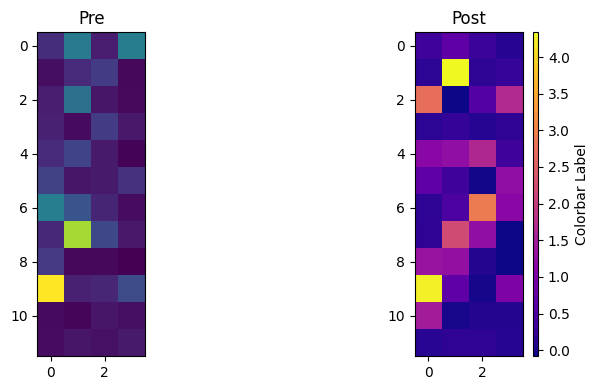

In [8]:
# Plots the tuning of the cell in both recordings against one another. 

# Create a 2-panel figure with a shared colorbar
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first array in the first subplot
im1 = axs[0].imshow(data_pre[key1]['peak_tuning'], cmap='viridis')
axs[0].set_title('Pre')


# Plot the second array in the second subplot
im2 = axs[1].imshow(data_post[key2]['peak_tuning'], cmap='plasma')  # 'plasma' is just another example colormap
axs[1].set_title('Post')


# Add a colorbar to the right of the subplots
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('Colorbar Label')  # Replace with your desired label

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'active_pre' is not defined

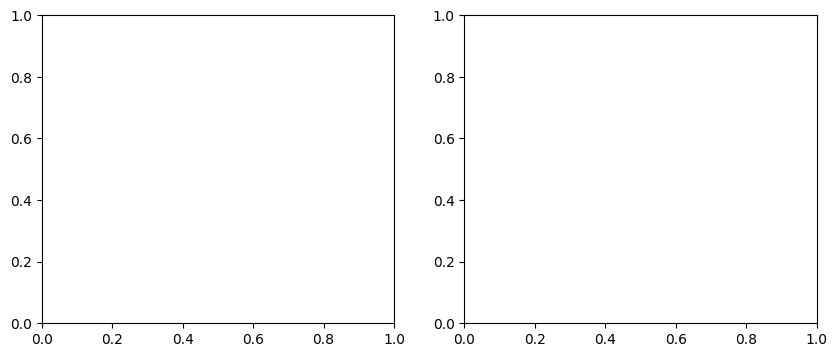

In [7]:
# Plots the tuning of the cell in both recordings against one another. 

# Create a 2-panel figure with a shared colorbar
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first array in the first subplot
im1 = axs[0].imshow(active_pre[key]['tuning'], cmap='viridis')
axs[0].set_title('Pre')


# Plot the second array in the second subplot
im2 = axs[1].imshow(active_post[key]['tuning'], cmap='plasma')  # 'plasma' is just another example colormap
axs[1].set_title('Post')


# Add a colorbar to the right of the subplots
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('Colorbar Label')  # Replace with your desired label

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
def find_max_column(arr):
    # Find the column index of the global maximum value in the flattened array
    global_max_index = np.argmax(arr)

    # Convert the flattened index to row and column indices
    row_index, global_max_column_index = np.unravel_index(global_max_index, arr.shape)

    return global_max_column_index

In [10]:
# Take the list of mutually active cells, and finds the best frequency across all intensities.  
# Finds out which intensity contains the BF in the first recording, and takes all frequencies at that intensity, for both recordings.
# e.g. if the BF across the whole array is at 65 dB, it'll take the whole 65 dB row for both recordings. 
# Counts the number of cells that retain their BF to within a specific range of frequencies and returns counts of those that changed or stayed the same. 

def compare_max_values_for_keys(keys, dict1, dict2, within_range):
    same_place_counter = 0
    not_same_counter = 0
    BF_changed_cells = []

    for key in keys:
        if key in dict1 and key in dict2:
            array1 = dict1[key]['tuning']
            BF_column = find_max_column(array1)

            array1 = array1[:,BF_column]

            array2 = dict2[key]['tuning']
            array2 = array2[:,BF_column]

            max_value_index1 = np.argmax(array1)

            max_value_index2 = np.argmax(array2)

            diff_positions = abs(max_value_index1 - max_value_index2)

            if max_value_index1 == max_value_index2 or diff_positions <= within_range:
                same_place_counter += 1
            else:
                not_same_counter += 1
                BF_changed_cells.append(key)

    return same_place_counter, not_same_counter, BF_changed_cells



In [11]:
BF_unchanged, BF_changed, BF_changed_cells = compare_max_values_for_keys(active_both, active_pre, active_post,2)
print("BF Unchanged = ",BF_unchanged)
print("BF Changed = ",BF_changed)

Percent_changed = BF_changed/len(active_both)*100
print("% Changed = ", Percent_changed)

print(BF_changed_cells)


BF Unchanged =  101
BF Changed =  57
% Changed =  36.075949367088604
[9, 21, 46, 54, 74, 79, 95, 116, 118, 133, 142, 144, 183, 188, 204, 205, 217, 225, 227, 229, 231, 235, 242, 264, 275, 282, 294, 295, 327, 343, 346, 404, 452, 477, 507, 513, 519, 546, 647, 694, 716, 737, 751, 790, 834, 876, 895, 1043, 1081, 1112, 1156, 1209, 1297, 1362, 1444, 1765, 2120]


CORRELATION ANALYSIS: 

In [12]:
cell_list = list(data_pre.keys())
nfreq = list(data_pre[cell_list[0]]['traces'].keys())
nInt = list(data_pre[cell_list[0]]['traces'][nfreq[0]].keys())
ntrial = list(data_pre[cell_list[0]]['traces'][nfreq[0]][nInt[0]].keys())

print(nfreq, nInt, ntrial)


[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [13]:
raster_filepath = "F:/Two-Photon/Psilocybin Project/evoked_combined/ID474/saline/post_saline/ID474_post_saline_all_cells.npy"

raster_matrix = np.load(raster_filepath)

print(raster_matrix.shape)

plt.imshow(raster_matrix)

FileNotFoundError: [Errno 2] No such file or directory: 'F:/Two-Photon/Psilocybin Project/evoked_combined/ID474/saline/post_saline/ID474_post_saline_all_cells.npy'

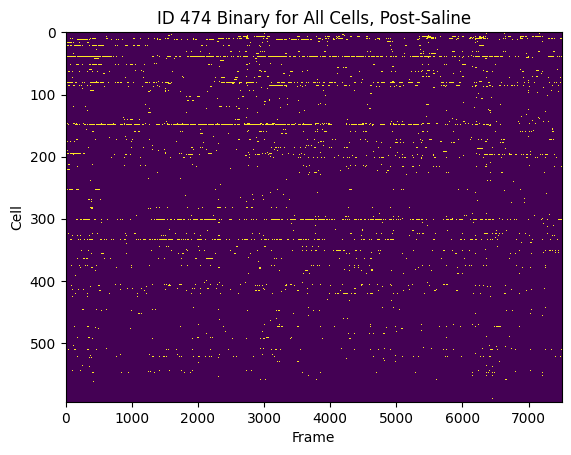

In [ ]:
plt.imshow(raster_matrix, cmap='viridis', aspect='auto', interpolation='none')
plt.xlabel('Frame')
plt.ylabel('Cell')
plt.title('ID 474 Binary for All Cells, Post-Saline')
plt.show()

In [ ]:
active_list = list(active_post.keys())
print(active_list)
active_index = [x -1 for x in active_list]
print(active_index)

[3, 4, 11, 13, 14, 18, 21, 22, 24, 25, 26, 27, 29, 31, 32, 39, 43, 45, 49, 50, 53, 56, 58, 59, 60, 61, 62, 64, 69, 70, 74, 75, 77, 79, 83, 85, 86, 87, 88, 89, 91, 93, 95, 100, 101, 105, 107, 108, 109, 110, 112, 114, 115, 120, 126, 130, 132, 133, 134, 135, 136, 139, 142, 146, 147, 148, 149, 153, 154, 156, 159, 160, 162, 163, 164, 167, 168, 171, 172, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 189, 192, 194, 195, 197, 198, 199, 203, 204, 205, 207, 208, 209, 211, 215, 216, 217, 218, 225, 227, 228, 229, 230, 234, 237, 239, 241, 243, 245, 247, 251, 256, 258, 259, 263, 265, 267, 271, 281, 285, 287, 290, 294, 295, 296, 297, 300, 305, 306, 308, 312, 313, 315, 318, 321, 323, 325, 327, 332, 334, 336, 339, 341, 347, 348, 350, 351, 352, 354, 355, 358, 359, 360, 361, 363, 364, 366, 367, 371, 373, 375, 378, 383, 386, 387, 397, 404, 405, 407, 409, 410, 412, 415, 430, 431, 436, 437, 438, 440, 447, 448, 450, 456, 457, 463, 464, 465, 466, 467, 468, 476, 479, 483, 488, 491, 492, 494, 495, 504, 508,